# Simple Neural Network using PyTorch

Data used for this notebook is from a Kaggle competition  
Link to the competition: https://www.kaggle.com/c/santander-customer-transaction-prediction  
Type of Problem: Classification  

## Import libraries

In [1]:
import torch
from torch import nn

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

In [2]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


## Get training data

In [3]:
df_train = pd.read_csv('data/train.csv')

print(df_train.shape)
df_train.head(2)

(200000, 202)


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.093,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.389,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518


In [4]:
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


## Pre-processing data

In [5]:
var_columns = [c for c in df_train.columns if c not in ('ID_code','target')]
len(var_columns)

200

In [6]:
scaler = MinMaxScaler()

df_train[var_columns] = scaler.fit_transform(df_train[var_columns])
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,0.515985,0.527761,0.498848,0.516818,0.517698,0.551997,0.501877,0.501123,0.522330,...,0.532601,0.521950,0.470032,0.502746,0.483477,0.536917,0.507605,0.488022,0.483899,0.527460
std,0.300653,0.152716,0.159324,0.153221,0.154463,0.139968,0.157852,0.142057,0.152988,0.161333,...,0.140158,0.155773,0.121015,0.132779,0.162998,0.149925,0.167666,0.152592,0.152223,0.154974
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.404160,0.405322,0.383234,0.400217,0.414637,0.428839,0.396761,0.384659,0.396368,...,0.431376,0.404422,0.385063,0.411373,0.360573,0.429027,0.376952,0.379516,0.380712,0.410436
50%,0.000000,0.508191,0.528530,0.491004,0.518970,0.520277,0.556658,0.497967,0.497138,0.527633,...,0.531653,0.517279,0.467860,0.504894,0.481614,0.533706,0.510850,0.484718,0.487100,0.534987
75%,0.000000,0.620387,0.645236,0.603369,0.632294,0.619692,0.672246,0.599256,0.615573,0.650798,...,0.630091,0.628818,0.553659,0.598340,0.608396,0.638836,0.638353,0.601460,0.594820,0.648661
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Split training data into dependent and independent variables

In [7]:
X_np = df_train.loc[:, var_columns].to_numpy()
y_np = df_train.loc[:, 'target'].to_numpy()

In [8]:
X = torch.tensor(X_np, dtype=torch.float32)
y = torch.tensor(y_np, dtype=torch.float32).reshape(-1,1)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

(torch.Size([160000, 200]),
 torch.Size([40000, 200]),
 torch.Size([160000, 1]),
 torch.Size([40000, 1]))

## Define model structure

In [10]:
model = nn.Sequential(
    nn.Linear(200, 80),
    nn.ReLU(),
    nn.Linear(80, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

Print the model architecture

In [11]:
print(model)

Sequential(
  (0): Linear(in_features=200, out_features=80, bias=True)
  (1): ReLU()
  (2): Linear(in_features=80, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
  (5): Sigmoid()
)


## Training on entire data for multiple epochs

Define loss function and optimiser for training

In [12]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [13]:
n_epochs = 40
batch_size = 1000

In [14]:
loss_train_list=[]
loss_val_list=[]

for epoch in range(n_epochs):
    for b in range(0, X_train.shape[0], batch_size):
        # Start training
        model.train()

        # Get data in batches
        X_train_batch = X_train[b:b+batch_size]
        y_train_batch = y_train[b:b+batch_size]

        # Make predictions
        y_train_batch_pred = model(X_train_batch)

        # Calculate loss
        loss_train = loss_fn(y_train_batch_pred, y_train_batch)

        # Backpropagation
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

    # Evaluation on validation data
    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_val)
        loss_val = loss_fn(y_val_pred, y_val)
        loss_train_list.append(loss_train.item())
        loss_val_list.append(loss_val.item())
        print(f'Epoch {epoch}, training loss {loss_train}, validation loss {loss_val}')

Epoch 0, training loss 0.26946815848350525, validation loss 0.3289490342140198
Epoch 1, training loss 0.2672939896583557, validation loss 0.3266052305698395
Epoch 2, training loss 0.26330816745758057, validation loss 0.32268795371055603
Epoch 3, training loss 0.25447922945022583, validation loss 0.3151164948940277
Epoch 4, training loss 0.23484231531620026, validation loss 0.2970728576183319
Epoch 5, training loss 0.23780788481235504, validation loss 0.2736271917819977
Epoch 6, training loss 0.22688338160514832, validation loss 0.26356378197669983
Epoch 7, training loss 0.25382256507873535, validation loss 0.2649419605731964
Epoch 8, training loss 0.2014947533607483, validation loss 0.2635470926761627
Epoch 9, training loss 0.22454580664634705, validation loss 0.24855375289916992
Epoch 10, training loss 0.22841857373714447, validation loss 0.24660420417785645
Epoch 11, training loss 0.21770846843719482, validation loss 0.2426786571741104
Epoch 12, training loss 0.2145819067955017, vali

## Plot Loss

In [15]:
df_loss = pd.DataFrame({"train_loss":loss_train_list, "validation_loss":loss_val_list})
df_loss["epoch"] = df_loss.index
df_loss.head(2)

,train_loss,validation_loss,epoch
0,0.269468,0.328949,0
1,0.267294,0.326605,1


<Axes: xlabel='epoch'>

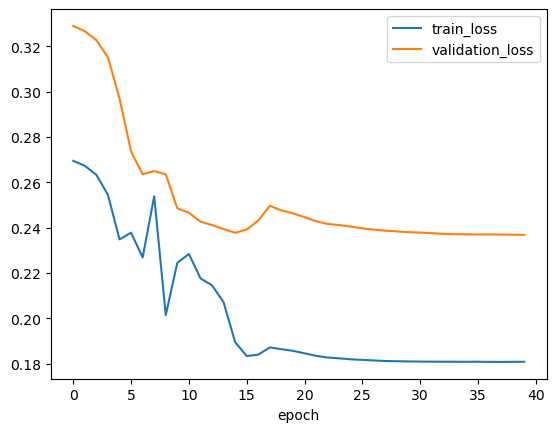

In [16]:
axs = plt.subplot()
df_loss.plot(x="epoch", y="train_loss", ax=axs)
df_loss.plot(x="epoch", y="validation_loss", ax=axs)

## Model performance

In [17]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_val.detach().numpy(), y_val_pred.detach().numpy())
roc_auc = auc(fpr, tpr)

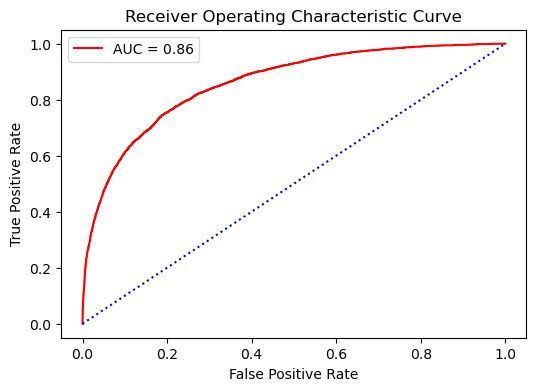

In [18]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='red', lw=1.5, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', lw=1.5, linestyle=':')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='upper left')
plt.show()